In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn import tree
import graphviz 

In [2]:
col = ["word_freq_make",         
"word_freq_address",      
"word_freq_all",          
"word_freq_3d",           
"word_freq_our",          
"word_freq_over",         
"word_freq_remove",       
"word_freq_internet",     
"word_freq_order",        
"word_freq_mail",         
"word_freq_receive",      
"word_freq_will",         
"word_freq_people",       
"word_freq_report",       
"word_freq_addresses",    
"word_freq_free",         
"word_freq_business",     
"word_freq_email",        
"word_freq_you",          
"word_freq_credit",       
"word_freq_your",         
"word_freq_font",         
"word_freq_000",          
"word_freq_money",        
"word_freq_hp",           
"word_freq_hpl",          
"word_freq_george",       
"word_freq_650",          
"word_freq_lab",          
"word_freq_labs",         
"word_freq_telnet",       
"word_freq_857",          
"word_freq_data",         
"word_freq_415",          
"word_freq_85",           
"word_freq_technology",   
"word_freq_1999",         
"word_freq_parts",        
"word_freq_pm",           
"word_freq_direct",       
"word_freq_cs",           
"word_freq_meeting",      
"word_freq_original",     
"word_freq_project",      
"word_freq_re",           
"word_freq_edu",          
"word_freq_table",        
"word_freq_conference",   
"char_freq_;",            
"char_freq_(",            
"char_freq_[",            
"char_freq_!",            
"char_freq_$",            
"char_freq_#",            
"capital_run_length_average", 
"capital_run_length_longest", 
"capital_run_length_total",
      "y"]


In [3]:
df = pd.read_csv("data/spambase.data",header=None)
df.columns = col

In [4]:
df.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,y
893,0.0,0.00,0.00,0.0,0.00,0.32,0.0,0.0,0.0,0.0,...,0.18,0.270,0.045,0.000,0.0,0.0,2.000,14,178,1
3776,0.2,0.00,0.20,0.0,0.40,0.00,0.0,0.0,0.0,0.0,...,0.00,0.042,0.000,0.014,0.0,0.0,4.325,63,545,0
4054,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.00,0.197,0.000,0.000,0.0,0.0,2.315,7,44,0
39,0.0,0.41,1.66,0.0,0.41,0.00,0.0,0.0,0.0,0.0,...,0.00,0.068,0.000,0.750,0.0,0.0,3.851,121,285,1
2720,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.00,0.000,0.000,0.000,0.0,0.0,1.000,1,6,0


In [5]:
train_x,test_x,train_y,test_y=train_test_split(df.loc[:, df.columns != 'y'],df['y'])

In [6]:
model = LogisticRegression()
model.fit(train_x,train_y)
print("Train acc:",model.score(train_x,train_y))
print("Test acc:",model.score(test_x,test_y))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train acc: 0.9304347826086956
Test acc: 0.9235447437011295


## 1) Forward Stepwise Selection

In [7]:
train_x1,test_x1,train_y1,test_y1 = train_x.copy(),test_x.copy(),train_y.copy(),test_y.copy()

In [8]:
clf = LogisticRegression(solver="lbfgs",max_iter=10000)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=50,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=0,
          n_jobs=-1)

# Perform SFFS
sfs1 = sfs1.fit(train_x1, train_y1,
          custom_feature_names=col[:-1])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  46 out of  57 | elapsed:    3.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    3.2s finished

[2018-12-13 18:15:25] Features: 1/50 -- score: 0.7739130434782608[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.0s finished

[2018-12-13 18:15:25] Features: 2/50 -- score: 0.8226086956521739[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.1s finished

[2018-12-13 18:15:25] Features: 3/50 -- score: 0.8457971014492753[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.1s finished

[2018-12-13 18:15:26] Features: 4/50 -- score: 0.86[Parallel(n_jobs=-1

[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.4s finished

[2018-12-13 18:15:36] Features: 32/50 -- score: 0.9281159420289855[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s finished

[2018-12-13 18:15:36] Features: 33/50 -- score: 0.9278260869565217[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.4s finished

[2018-12-13 18:15:37] Features: 34/50 -- score: 0.9281159420289855[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  23 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.4s finished

[2018-12-13 18:15:37] Features: 35/50 -- score: 0.928695652173913[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  22 | elapsed:    0.0s re

In [9]:
sfs1.subsets_

{1: {'feature_idx': (52,),
  'cv_scores': array([0.77391304]),
  'avg_score': 0.7739130434782608,
  'feature_names': ('char_freq_$',)},
 2: {'feature_idx': (6, 52),
  'cv_scores': array([0.8226087]),
  'avg_score': 0.8226086956521739,
  'feature_names': ('word_freq_remove', 'char_freq_$')},
 3: {'feature_idx': (6, 24, 52),
  'cv_scores': array([0.8457971]),
  'avg_score': 0.8457971014492753,
  'feature_names': ('word_freq_remove', 'word_freq_hp', 'char_freq_$')},
 4: {'feature_idx': (6, 24, 51, 52),
  'cv_scores': array([0.86]),
  'avg_score': 0.86,
  'feature_names': ('word_freq_remove',
   'word_freq_hp',
   'char_freq_!',
   'char_freq_$')},
 5: {'feature_idx': (6, 24, 45, 51, 52),
  'cv_scores': array([0.87072464]),
  'avg_score': 0.8707246376811594,
  'feature_names': ('word_freq_remove',
   'word_freq_hp',
   'word_freq_edu',
   'char_freq_!',
   'char_freq_$')},
 6: {'feature_idx': (6, 24, 26, 45, 51, 52),
  'cv_scores': array([0.89101449]),
  'avg_score': 0.8910144927536232,
  

In [10]:
sfs1.get_metric_dict()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{1: {'feature_idx': (52,),
  'cv_scores': array([0.77391304]),
  'avg_score': 0.7739130434782608,
  'feature_names': ('char_freq_$',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (6, 52),
  'cv_scores': array([0.8226087]),
  'avg_score': 0.8226086956521739,
  'feature_names': ('word_freq_remove', 'char_freq_$'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (6, 24, 52),
  'cv_scores': array([0.8457971]),
  'avg_score': 0.8457971014492753,
  'feature_names': ('word_freq_remove', 'word_freq_hp', 'char_freq_$'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (6, 24, 51, 52),
  'cv_scores': array([0.86]),
  'avg_score': 0.86,
  'feature_names': ('word_freq_remove',
   'word_freq_hp',
   'char_freq_!',
   'char_freq_$'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (6, 24, 45, 51, 52),
  'cv_scores': array([0.87072464]),
  'avg_score': 0.8707246376811594,
  'feature_name

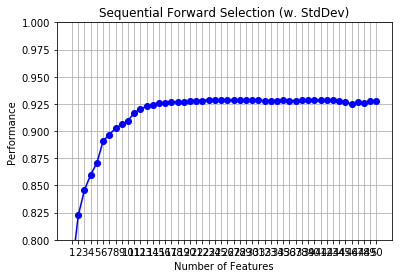

In [11]:
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [43]:
feat_cols = list(sfs1.subsets_[16]['feature_names'])
print(feat_cols)


['word_freq_our', 'word_freq_remove', 'word_freq_will', 'word_freq_money', 'word_freq_hp', 'word_freq_george', 'word_freq_650', 'word_freq_pm', 'word_freq_meeting', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'char_freq_;', 'char_freq_!', 'char_freq_$', 'capital_run_length_average']


In [44]:
train_x1.loc[:,feat_cols].shape

(3450, 16)

In [45]:
train_y1.shape

(3450,)

In [46]:
model1 = LogisticRegression()
model1.fit(train_x1.loc[:,feat_cols],train_y1)
print("Train acc:",model1.score(train_x1.loc[:,feat_cols],train_y1))
print("Test acc:",model1.score(test_x1.loc[:,feat_cols],test_y1))

Train acc: 0.9260869565217391
Test acc: 0.9192006950477846


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 2) Backward Stepwise Selection

In [16]:
train_x2,test_x2,train_y2,test_y2 = train_x.copy(),test_x.copy(),train_y.copy(),test_y.copy()

In [17]:
clf = LogisticRegression(solver="lbfgs", max_iter=10000)

# Build step forward feature selection
sfs2 = sfs(clf,
           k_features=10,
           forward=False,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=0,
          n_jobs=-1)

# Perform SFFS
sfs2 = sfs2.fit(train_x2.values, train_y2.values,
          custom_feature_names=col[:-1])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   16.9s finished

[2018-12-13 18:16:03] Features: 56/10 -- score: 0.9327536231884058[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:   15.9s finished

[2018-12-13 18:16:19] Features: 55/10 -- score: 0.9327536231884058[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   14.4s finished

[2018-12-13 18:16:34] Features: 54/10 -- score: 0.9330434782608695[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  54 ou

[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.9s finished

[2018-12-13 18:18:58] Features: 24/10 -- score: 0.9260869565217391[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.9s finished

[2018-12-13 18:18:59] Features: 23/10 -- score: 0.9260869565217391[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  23 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.8s finished

[2018-12-13 18:18:59] Features: 22/10 -- score: 0.9249275362318841[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  22 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.7s finished

[2018-12-13 18:19:00] Features: 21/10 -- score: 0.922608695652174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 con

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


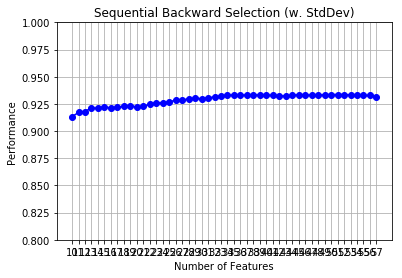

In [19]:
fig1 = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [40]:
sfs2.subsets_[34]['feature_names']==sfs1.subsets_[34]['feature_names']

False

In [41]:
feat_cols = list(sfs2.subsets_[34]['feature_names'])
print(feat_cols)

['word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_will', 'word_freq_report', 'word_freq_free', 'word_freq_business', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_data', 'word_freq_technology', 'word_freq_parts', 'word_freq_pm', 'word_freq_meeting', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'char_freq_;', 'char_freq_!', 'char_freq_$', 'capital_run_length_average', 'capital_run_length_longest']


In [42]:
model2 = LogisticRegression()
model2.fit(train_x2.loc[:,feat_cols],train_y2)
print("Train acc:",model2.score(train_x2.loc[:,feat_cols],train_y2))
print("Test acc:",model2.score(test_x2.loc[:,feat_cols],test_y2))

Train acc: 0.9330434782608695
Test acc: 0.9209383145091226


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## SS conclusion

These algorithms found different subsets, probably because there are interconnected features which are dropped or added in different order, thus creating different sets.

## 3) Devision trees

In [23]:
train_x3,test_x3,train_y3,test_y3 = train_x.copy(),test_x.copy(),train_y.copy(),test_y.copy()

In [24]:
clf = tree.DecisionTreeClassifier()
clf.fit(train_x3,train_y3)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 


'iris.pdf'

In [26]:
clf.score(train_x3,train_y3)

0.9994202898550725

In [27]:
clf.feature_importances_

array([5.70905259e-04, 0.00000000e+00, 1.12734632e-03, 1.08477237e-03,
       2.54769102e-02, 3.96132351e-03, 1.04134756e-01, 8.42930830e-03,
       3.10898581e-04, 6.28560804e-03, 7.67472815e-03, 6.01146107e-03,
       6.02585037e-03, 1.81818476e-03, 0.00000000e+00, 6.04755725e-02,
       1.04265239e-02, 4.79818289e-03, 2.49094541e-02, 2.24974849e-03,
       1.08005860e-02, 1.05850646e-03, 1.63002624e-03, 4.43848605e-03,
       4.74243035e-02, 3.16070917e-03, 1.82224351e-02, 8.33404174e-03,
       0.00000000e+00, 1.14858251e-03, 0.00000000e+00, 0.00000000e+00,
       2.37887526e-03, 0.00000000e+00, 0.00000000e+00, 2.77887083e-03,
       7.61685044e-03, 0.00000000e+00, 1.06956858e-03, 1.13984023e-03,
       0.00000000e+00, 1.99685514e-03, 3.84707420e-04, 1.73882237e-03,
       8.02052392e-03, 2.14861256e-02, 0.00000000e+00, 0.00000000e+00,
       4.51241251e-03, 7.97948612e-03, 0.00000000e+00, 3.40424114e-01,
       5.04757399e-02, 1.80239101e-03, 3.20284132e-02, 1.31097314e-01,
      

In [28]:
train_x3.columns = range(len(train_x3.columns))
test_x3.columns = range(len(train_x3.columns))

In [29]:
feat_cols = np.nonzero(clf.feature_importances_)[0].tolist()
print(feat_cols)


[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 32, 35, 36, 38, 39, 41, 42, 43, 44, 45, 48, 49, 51, 52, 53, 54, 55, 56]


In [30]:
model3 = LogisticRegression()
model3.fit(train_x3.loc[:,feat_cols],train_y3)
print("Train acc:",model3.score(train_x3.loc[:,feat_cols],train_y3))
print("Test acc:",model3.score(test_x3.loc[:,feat_cols],test_y3))

Train acc: 0.9301449275362319
Test acc: 0.9209383145091226


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 4) Manual selection

In [31]:
train_x4,test_x4,train_y4,test_y4 = train_x.copy(),test_x.copy(),train_y.copy(),test_y.copy()

In [32]:
import pandas_profiling

In [33]:
pandas_profiling.ProfileReport(train_x4)

Number of variables,58
Number of observations,3450
Total Missing (%),0.0%
Total size in memory,1.5 MiB
Average record size in memory,464.0 B
Numeric,57
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [34]:
feat_cols=train_x4.var()
feat_cols

word_freq_make                     0.092106
word_freq_address                  1.585689
word_freq_all                      0.271740
word_freq_3d                       2.169528
word_freq_our                      0.449226
word_freq_over                     0.080388
word_freq_remove                   0.167573
word_freq_internet                 0.157513
word_freq_order                    0.072247
word_freq_mail                     0.402768
word_freq_receive                  0.042249
word_freq_will                     0.722280
word_freq_people                   0.097504
word_freq_report                   0.113254
word_freq_addresses                0.062594
word_freq_free                     0.661276
word_freq_business                 0.198587
word_freq_email                    0.279869
word_freq_you                      3.229985
word_freq_credit                   0.276767
word_freq_your                     1.424765
word_freq_font                     1.165455
word_freq_000                   

Drop word_freq_415 because it's highly correlated with another column and drop values with low variance(less than 0.1).
There are apparently no missing values

In [35]:
feat_cols=feat_cols[feat_cols>0.1]

In [36]:
feat_cols=feat_cols.index.tolist()

In [37]:
feat_cols.remove("word_freq_415")

In [38]:
model4 = LogisticRegression()
model4.fit(train_x4.loc[:,feat_cols],train_y4)
print("Train acc:",model4.score(train_x4.loc[:,feat_cols],train_y4))
print("Test acc:",model4.score(test_x4.loc[:,feat_cols],test_y4))

Train acc: 0.9194202898550725
Test acc: 0.9044309296264118


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Conclusion

In [39]:
#TODO: write accuracy here

FSS and BSS showed the best results as they were specifically searching for the most important features, but they did it at cost of time.
Decision tree allowed to drop some unimportant features, but it slightly dropped accuracy. It's pretty fast approach, but in no way optimal.
Manual selection was the fastest option, but as it cannot know or test real impact of a feature, it dropped accuracy, more that decision tree.